## Spotify Song Recommender
This notebook will contain important analysis done on the Spotify song dataset.

In [41]:
import pickle
import pandas as pd

with open('spotify_dataset_new.pkl', 'rb') as f:
    data = pickle.load(f)

In [837]:
data.head()

,acousticness,valence,loudness,mode,key,speechiness,energy,instrumentalness,danceability,id,tempo,liveness,name,artist
0,0.80600,0.601,-16.089,1,2,0.0324,0.198,0.000000,0.507,5mnvqisoDJilY0uCEdT8rG,141.261,0.1020,Danny's Song,Loggins & Messina
1,0.02140,0.505,-8.080,1,5,0.0296,0.673,0.000444,0.542,5sY2beqWPiCRmTyjEkRPPZ,88.039,0.2810,To Find A Friend,Tom Petty
2,0.04570,0.978,-4.906,1,9,0.0320,0.960,0.000000,0.574,2Y90nL1ohB4sgYELDs7uNx,117.486,0.1210,Glory Days,Bruce Springsteen
3,0.22500,0.502,-10.997,1,9,0.0528,0.519,0.000004,0.630,0sDqo9UPzPUtu9wEkI3zRB,143.942,0.0974,The Weight - Remastered,The Band
4,0.00298,0.491,-10.961,1,9,0.0378,0.760,0.029400,0.380,24NwBd5vZ2CK8VOQVnqdxr,99.437,0.1040,Sweet Emotion,Aerosmith


In [815]:
#Reordered the columns of the dataset
data_reordered = data[['id',
 'name',
 'artist',
 'energy',
 'danceability',
 'acousticness',
 'instrumentalness',
 'mode',
 'liveness',
 'key',
 'tempo',
 'valence',
 'loudness',
 'speechiness']]

In [839]:
data_reordered.head()

,id,name,artist,energy,danceability,acousticness,instrumentalness,mode,liveness,key,tempo,valence,loudness,speechiness
0,5mnvqisoDJilY0uCEdT8rG,Danny's Song,Loggins & Messina,0.198,0.507,0.80600,0.000000,1,0.1020,2,141.261,0.601,-16.089,0.0324
1,5sY2beqWPiCRmTyjEkRPPZ,To Find A Friend,Tom Petty,0.673,0.542,0.02140,0.000444,1,0.2810,5,88.039,0.505,-8.080,0.0296
2,2Y90nL1ohB4sgYELDs7uNx,Glory Days,Bruce Springsteen,0.960,0.574,0.04570,0.000000,1,0.1210,9,117.486,0.978,-4.906,0.0320
3,0sDqo9UPzPUtu9wEkI3zRB,The Weight - Remastered,The Band,0.519,0.630,0.22500,0.000004,1,0.0974,9,143.942,0.502,-10.997,0.0528
4,24NwBd5vZ2CK8VOQVnqdxr,Sweet Emotion,Aerosmith,0.760,0.380,0.00298,0.029400,1,0.1040,9,99.437,0.491,-10.961,0.0378


### Searched Track
3 tracks were pickled in the backend, to use for analysis after creating the model.

In [880]:
#track we're searching for
with open('new_searched_track2.pkl', 'rb') as f:
    searched = pickle.load(f)

searched_track = searched[['id',
 'name',
 'artist',
 'energy',
 'danceability',
 'acousticness',
 'instrumentalness',
 'mode',
 'liveness',
 'key',
 'tempo',
 'valence',
 'loudness',
 'speechiness']]
searched_track

,id,name,artist,energy,danceability,acousticness,instrumentalness,mode,liveness,key,tempo,valence,loudness,speechiness
0,3HPpeGRZbU26wF2J5A7tas,24K Magic / Perm / Uptown Funk - Medley,Berklee Bruno Mars Ensemble,0.745,0.564,0.0525,0,1,0.162,1,129.351,0.611,-7.854,0.162


### Correlation Map

In [881]:
#pca example 2
correlation = data_reordered.corr()
correlation.style.background_gradient(cmap='coolwarm')


,energy,danceability,acousticness,instrumentalness,mode,liveness,key,tempo,valence,loudness,speechiness
energy,1.000000,0.311106,-0.791947,-0.447718,-0.067689,0.228919,0.039333,0.250418,0.424055,0.803880,0.138610
danceability,0.311106,1.000000,-0.330823,-0.340426,-0.080429,-0.073679,0.026816,0.007112,0.547238,0.443800,0.197797
acousticness,-0.791947,-0.330823,1.000000,0.419751,0.065747,-0.167539,-0.033514,-0.211367,-0.307314,-0.678517,-0.136080
instrumentalness,-0.447718,-0.340426,0.419751,1.000000,-0.021086,-0.084887,-0.023469,-0.140500,-0.383642,-0.627077,-0.125773
mode,-0.067689,-0.080429,0.065747,-0.021086,1.000000,-0.013341,-0.143667,0.004327,-0.017941,-0.038071,-0.088691
liveness,0.228919,-0.073679,-0.167539,-0.084887,-0.013341,1.000000,0.002180,0.037933,0.021407,0.135344,0.088395
key,0.039333,0.026816,-0.033514,-0.023469,-0.143667,0.002180,1.000000,0.001123,0.030481,0.033246,0.018973
tempo,0.250418,0.007112,-0.211367,-0.140500,0.004327,0.037933,0.001123,1.000000,0.126131,0.235523,0.074261
valence,0.424055,0.547238,-0.307314,-0.383642,-0.017941,0.021407,0.030481,0.126131,1.000000,0.417432,0.093272
loudness,0.803880,0.443800,-0.678517,-0.627077,-0.038071,0.135344,0.033246,0.235523,0.417432,1.000000,0.117156


All features except for ID, Song Title and Artist Name (id, name, artist respectively) were selected for creating the model.

In [882]:
features = data_reordered.loc[:, 'energy':'speechiness']
cols_to_standardize = features.columns.tolist()

### Standardization
I chose to avaoid standardization in the end. The reason for this is because, my clusters were in fact highly inaccurate after performing standardization. I learned that scaling of the data can be helpful when you know exactly how to scale for your dataset, ie. know which parameters to tune, which scaler to use, etc. Since I wasn't perfectly sure of this information, I went along without scaling and my results improved vastly.

In [883]:
# from sklearn.preprocessing import StandardScaler
# std_audio = StandardScaler().fit_transform(data_reordered[cols_to_standardize]) # normalizing the data

### Principal Component Analysis for Dimensionality Reduction
Here, I performed PCA on the dataset with 2 components and created some insightful graphs and plots to learn more about my dataset.

In [884]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_reordered[cols_to_standardize])

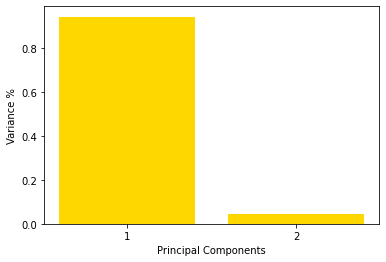

In [885]:
# Plotting the variances for each PC
import matplotlib.pyplot as plt

PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

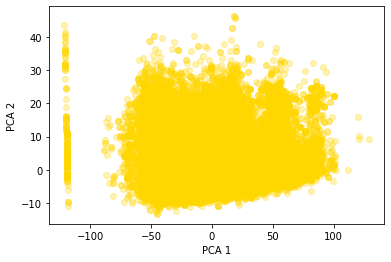

In [886]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

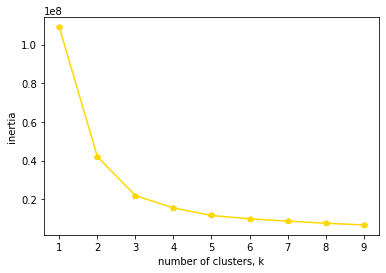

In [887]:
from sklearn.cluster import KMeans

inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
#plt.xticks(k)
plt.show()

## KMeans Clustering on PCA Components
I performed KMeans Clustering on the data using the 2 PCA componets, using 20 clusters. This helped spread the songs into more clusters.

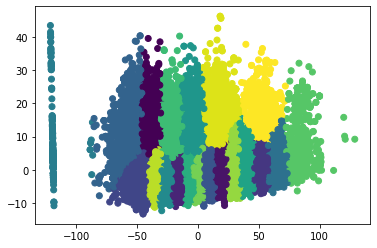

                0          1
0       22.125986   7.862206
1      -30.584420  -3.108995
2       -1.007756  -4.809314
3       25.080249   2.712221
4      -19.357036   0.266734
...           ...        ...
112622 -28.415394  13.608454
112623  17.908513  21.275961
112624 -16.047020  21.855751
112625 -40.455045  26.526805
112626 -31.460706  22.782030

[112627 rows x 2 columns]
[ 1 17 15 ... 13  0  0]


In [888]:
model = KMeans(n_clusters=20)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components)
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()
print(PCA_components)
print(labels)

Below, I've added columns that mentioned which cluster each track in the dataset belonged to.

In [889]:
#getting the labels in the new PCA Kmeans df
segm_kmeans = pd.concat([data_reordered.reset_index(drop=True)],axis=1)
segm_kmeans["Segment KMeans PCA"] = model.labels_
segm_kmeans["Segment"] = segm_kmeans["Segment KMeans PCA"].map({0:"Cluster 1",1:"Cluster 2",2:"Cluster 3",3:"Cluster 4",4:"Cluster 5",5:"Cluster 6",6:"Cluster 7",7:"Cluster 8",8: "Cluster 9",9: "Cluster 10", 10: "Cluster 11", 11: "Cluster 12",12: "Cluster 13", 13: "Cluster 14", 14: "Cluster 15",15:"Cluster 16",16:"Cluster 17",17:"Cluster 18",18:"Cluster 19",19:"Cluster 20"})
segm_kmeans


,id,name,artist,energy,danceability,acousticness,instrumentalness,mode,liveness,key,tempo,valence,loudness,speechiness,Segment KMeans PCA,Segment
0,5mnvqisoDJilY0uCEdT8rG,Danny's Song,Loggins & Messina,0.19800,0.507,0.806000,0.000000,1,0.1020,2,141.261,0.6010,-16.089,0.0324,1,Cluster 2
1,5sY2beqWPiCRmTyjEkRPPZ,To Find A Friend,Tom Petty,0.67300,0.542,0.021400,0.000444,1,0.2810,5,88.039,0.5050,-8.080,0.0296,17,Cluster 18
2,2Y90nL1ohB4sgYELDs7uNx,Glory Days,Bruce Springsteen,0.96000,0.574,0.045700,0.000000,1,0.1210,9,117.486,0.9780,-4.906,0.0320,15,Cluster 16
3,0sDqo9UPzPUtu9wEkI3zRB,The Weight - Remastered,The Band,0.51900,0.630,0.225000,0.000004,1,0.0974,9,143.942,0.5020,-10.997,0.0528,16,Cluster 17
4,24NwBd5vZ2CK8VOQVnqdxr,Sweet Emotion,Aerosmith,0.76000,0.380,0.002980,0.029400,1,0.1040,9,99.437,0.4910,-10.961,0.0378,2,Cluster 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112622,6KECEaBJjz7sz6One95awg,Lipgloss Application Pt. 1,Slight Sounds ASMR,0.24500,0.647,0.006510,0.000116,1,0.3240,1,91.101,0.0576,-24.567,0.4960,13,Cluster 14
112623,1WKMPkedR3z44hL8QifjOT,Anticipatory Ear to Ear Whispers Pt.1,Slight Sounds ASMR,0.01010,0.601,0.000684,0.169000,1,0.3090,1,137.771,0.0739,-29.725,0.1730,18,Cluster 19
112624,1ojOiN5E7NArWPkSqzojwT,Anticipatory Ear to Ear Whispers Pt.2,Slight Sounds ASMR,0.00416,0.560,0.002830,0.087700,1,0.1310,1,103.896,0.0893,-32.141,0.1380,13,Cluster 14
112625,01Zuq3xB12zBwqfbPT55r8,Making Your Eyes Heavy,fastASMR,0.13100,0.506,0.197000,0.000734,0,0.2220,10,79.787,0.0367,-38.382,0.0969,0,Cluster 1


## Cluster Visualization Plot

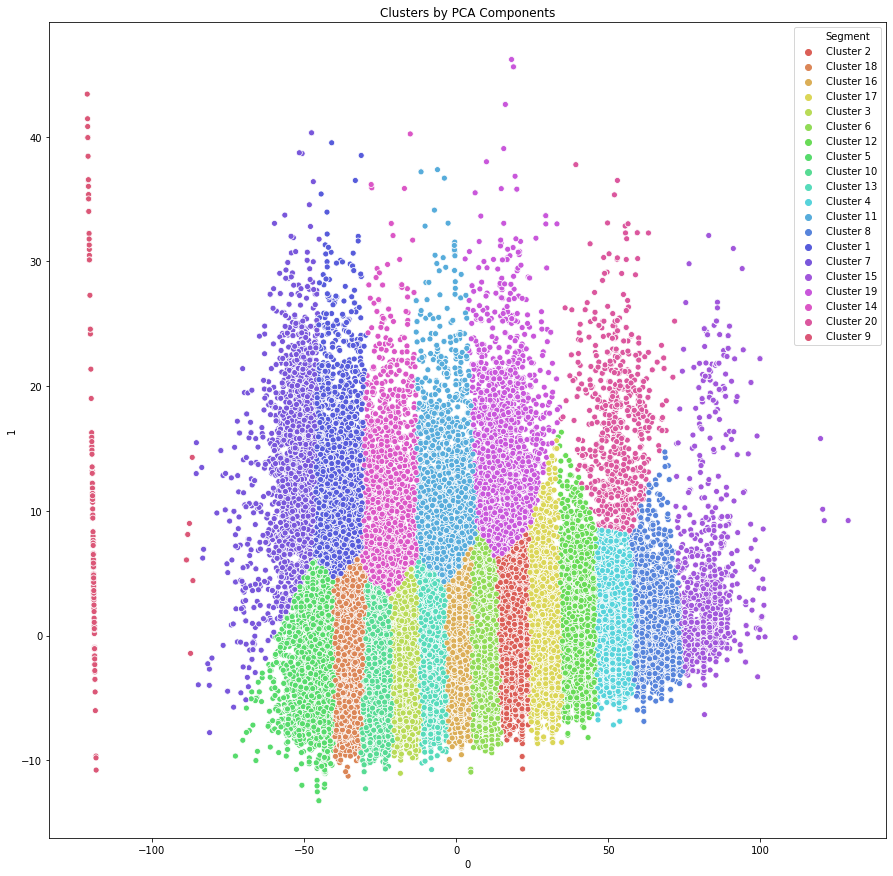

In [890]:
#visualization PCA Kmeans result
%matplotlib inline
import seaborn as sns

x_axis = PCA_components[0]
y_axis = PCA_components[1]
plt.figure(figsize=(15,15))
sns.scatterplot(x_axis,y_axis,hue = segm_kmeans["Segment"],palette = "hls")

plt.title("Clusters by PCA Components")
plt.show()

## Performing Analysis on Searched Track
Here I'm using the track I searched for in the beginning, to find out which cluster it now belongs to. I also check the results of that cluster to see if the results seemed similar in terms of audio features. There was a decent similarity with most of the songs.

In [891]:
from sklearn.preprocessing import StandardScaler
# std_audio = StandardScaler().fit_transform(searched_track[cols_to_standardize]) # normalizing the data
principleComponents = pca.transform(searched_track[cols_to_standardize])
PCA_components = pd.DataFrame(principleComponents)
print(model.predict(PCA_components))
PCA_components

[5]


,0,1
0,10.679138,-1.001994


In [893]:
x = segm_kmeans[segm_kmeans["Segment KMeans PCA"] == 5]
y = x.iloc[:, : 3].sample(n=30)
x.iloc[:, : 3]

,id,name,artist
7,6BD1X1PeV5UzYUdiVaD2yL,Show Me The Way,Peter Frampton
8,36gPq8WG7tDxrblyGVUCiT,Up Around The Bend,Creedence Clearwater Revival
12,4ApwwQKTdNQDtYvF20Mo0I,Pinball Wizard - Original Album Version,The Who
21,5zH710lFSLtkHbMkslLDjR,Crazy On You,Heart
29,4JVmESg1JVr2WqecNqFnch,Walking Back To Georgia,Jim Croce
...,...,...,...
112552,3wpLkju0bJy89kjgdRys0j,September,"Earth, Wind & Fire"
112555,0O7qtTVXI5fYIEJTNEZNxQ,"I Can't Help Myself (Sugar Pie, Honey Bunch)",Four Tops
112558,6l5D1WC6kR5cxaUOEyCGvs,"Sugar, Sugar",The Archies
112562,241RmK77gecJ1y7jOoQ5lu,This Will Be (An Everlasting Love),Natalie Cole
